# Clustering (군집화)
- data from 전력거래소
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## data read

In [4]:
df = pd.read_excel('./data/power_data.xls')
print(df.shape)

(19, 28)


In [5]:
print(df.columns)

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')


In [6]:
print(df.index)

RangeIndex(start=0, stop=19, step=1)


In [8]:
df['구분']

0     강원
1     개성
2     경기
3     경남
4     경북
5     광주
6     대구
7     대전
8     부산
9     서울
10    세종
11    울산
12    인천
13    전남
14    전북
15    제주
16    충남
17    충북
18    합계
Name: 구분, dtype: object

In [9]:
df.info

<bound method DataFrame.info of     구분       주거용       공공용       서비스업      업무용합계      농림어업       광업  \
0   강원   1940933   1400421    6203749    7604170    607139   398287   
1   개성         0         0          0          0         0        0   
2   경기  16587710   5533662   33434551   38968213   2371347   317263   
3   경남   4260988   1427560    8667737   10095297   2141813    95989   
4   경북   3302463   1578115    8487402   10065517   1747462   224568   
5   광주   1954876    565527    3174973    3740500     74608     2898   
6   대구   3151904    826396    5470438    6296834     69142     5858   
7   대전   1872890    954681    3955921    4910602     28643     3326   
8   부산   4473510   1305876    7582169    8888045    107927    25289   
9   서울  13131172   3581534   27647345   31228879     15150     4064   
10  세종    384903    299675     645424     945099     69469    16364   
11  울산   1487143    489865    3649386    4139251     80221    20103   
12  인천   3856852    921748    7154416    8076

In [10]:
df.describe()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,...,1.900000e+01,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,1.900000e+01
mean,6.899673e+06,2.410981e+06,1.451057e+07,1.692155e+07,1.650270e+06,1.628526e+05,2.694144e+07,1.158857e+06,1.184641e+06,2.016269e+05,...,1.107597e+06,51397.000000,6.087239e+05,5.018716e+06,1.878618e+06,4.595993e+05,3.581517e+05,59117.789474,2.875456e+07,5.257579e+07
std,1.457381e+07,4.957221e+06,3.031208e+07,3.526148e+07,3.464035e+06,3.102484e+05,5.669154e+07,2.399623e+06,2.604338e+06,4.514169e+05,...,2.437518e+06,127516.047494,1.300814e+06,1.190370e+07,3.981244e+06,1.058183e+06,8.481672e+05,126709.246048,6.037040e+07,1.092609e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.906912e+06,6.959615e+05,3.802654e+06,4.524926e+06,7.203850e+04,9.938500e+03,2.759556e+06,1.959545e+05,7.325600e+04,5.590500e+03,...,7.220050e+04,3672.000000,6.083550e+04,4.510550e+04,9.622850e+04,1.154750e+04,1.313200e+04,2739.000000,2.814293e+06,1.240509e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,7.152900e+04,1.236782e+07,5.329430e+05,3.338460e+05,2.799800e+04,...,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,4.058920e+06,1.413990e+06,8.034786e+06,9.476781e+06,1.837764e+06,1.822120e+05,2.366853e+07,1.034889e+06,8.374750e+05,1.033945e+05,...,8.433595e+05,14393.500000,5.898460e+05,2.614198e+06,2.256474e+06,1.775380e+05,1.976150e+05,46850.000000,2.530336e+07,4.005174e+07
max,6.457642e+07,2.220411e+07,1.347485e+08,1.569527e+08,1.537399e+07,1.347957e+06,2.529425e+08,1.073583e+07,1.124758e+07,1.905882e+06,...,1.050464e+07,487262.000000,5.763846e+06,4.765581e+07,1.779015e+07,4.311878e+06,3.396006e+06,559909.000000,2.696645e+08,4.911936e+08


In [11]:
df = df.set_index('구분')

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
개성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358


In [12]:
# 개성, 합계를 지움
df = df.drop(['개성', '합계'], errors = 'ignore')
print(df.shape)

(17, 27)


## Fonts for Korean (한글폰트)

In [13]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

<AxesSubplot:ylabel='구분'>

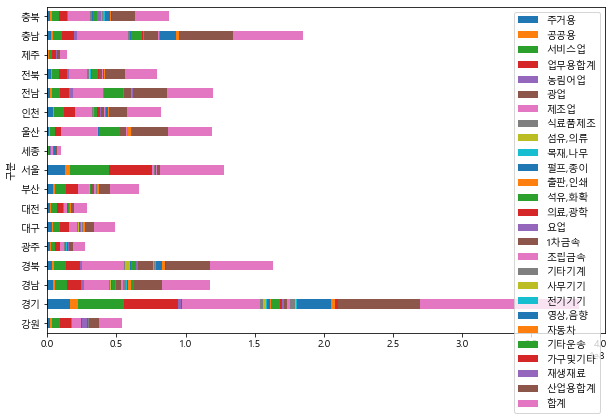

In [14]:
df.plot(kind='barh', figsize=(10,6), stacked=True)

<AxesSubplot:ylabel='구분'>

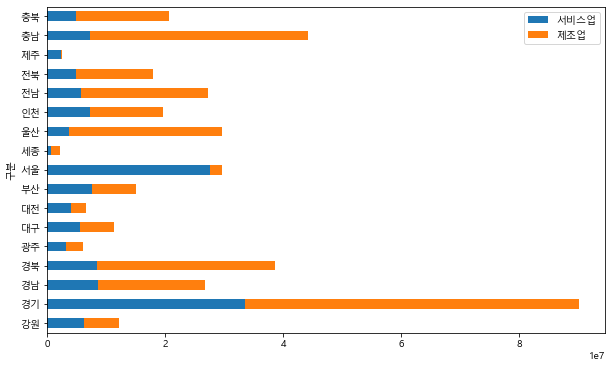

In [15]:
see_c = ['서비스업', '제조업']
df[see_c].plot(kind='barh', figsize=(10,6), stacked=True)

In [16]:
df2 = df[see_c]
df2.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


## Scatter plot

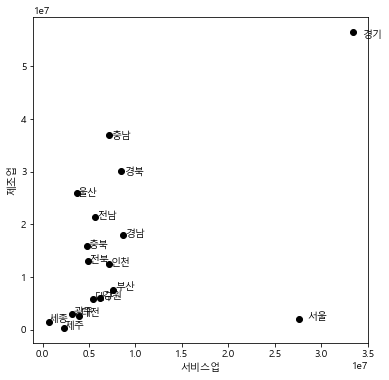

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(df2['서비스업'], df2['제조업'], c='k', marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(df2.shape[0]):
    plt.text(df2['서비스업'][n]*1.03, df2['제조업'][n]*0.98, df2.index[n])

In [19]:
# outlier인 경기와 서울 지움
df2 = df2.drop(['경기', '서울'])
df2.shape

(15, 2)

### Agglomerative clustering (Hierarchical) and Dendrogram

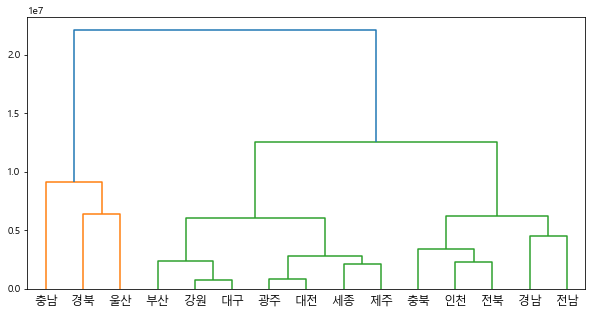

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 5))
link_dist = linkage(df2, metric='euclidean', method='centroid')
# method = ward, median, centroid, average, weightd, complete, single
dendrogram(link_dist, labels=list(df2.index))
plt.show()

# 덴드로그램에서 몇 개의 클러스터로 나눌지는 가로선을 그어서 겹치는 개수

### KMeans
Animation to explain algo - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

In [22]:
from sklearn.cluster import KMeans

# 4개로 clustering
km = KMeans(n_clusters = 4).fit(df2)
print(km.n_clusters)

4


In [23]:
km.labels_, km.cluster_centers_

(array([2, 3, 1, 2, 2, 2, 2, 2, 3, 0, 3, 0, 2, 1, 0]),
 array([[ 5623124.        , 13739046.33333333],
        [ 7825920.5       , 33586778.        ],
        [ 4191629.42857143,  3805868.14285714],
        [ 6002594.        , 21796945.33333333]]))

In [24]:
km_labels_two = km.labels_       # for compare later on (비교를 위함)

In [25]:
df2['클러스터'] = km.labels_
df2

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,2
경남,8667737,18053778,3
경북,8487402,30115601,1
광주,3174973,2910768,2
대구,5470438,5862633,2
대전,3955921,2608343,2
부산,7582169,7512588,2
세종,645424,1502922,2
울산,3649386,25883132,3


In [26]:
df2.drop('클러스터', axis = 1, inplace=True) ; df2.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [27]:
centers = km.cluster_centers_ ; centers

array([[ 5623124.        , 13739046.33333333],
       [ 7825920.5       , 33586778.        ],
       [ 4191629.42857143,  3805868.14285714],
       [ 6002594.        , 21796945.33333333]])

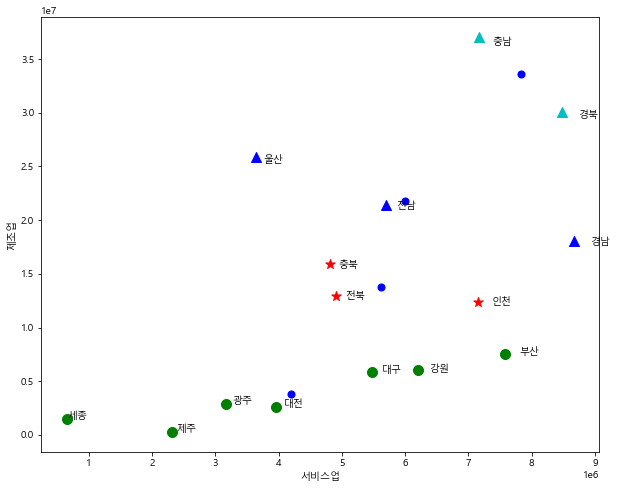

In [28]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(df2.shape[0]):
    label = km.labels_[n]
    plt.scatter(df2['서비스업'][n], df2['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(df2['서비스업'][n]*1.03, df2['제조업'][n]*0.98, df2.index[n])
    
for i in range(km.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'b', s= 50)

## Scaling (don't forget this process)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[['서비스업', '제조업']] = scaler.fit_transform(df2[['서비스업', '제조업']])
df2.head(3)

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632


### Clustering after Scaling

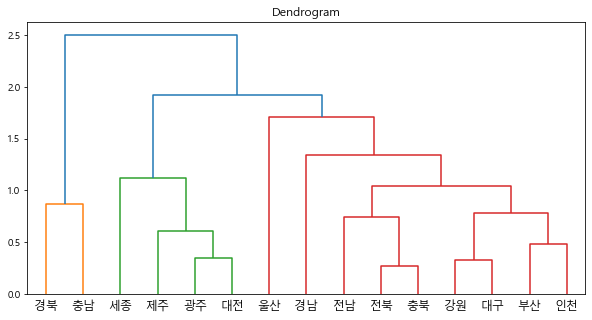

In [30]:
Z = linkage(df2, metric='euclidean', method='centroid')
plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
dendrogram(Z, labels=df2.index)
plt.show()

In [31]:
km = KMeans(n_clusters= 4).fit(df2)

In [32]:
centers = km.cluster_centers_
km_labels_two_scaled = km.labels_        # for compare later on

<Figure size 432x288 with 0 Axes>

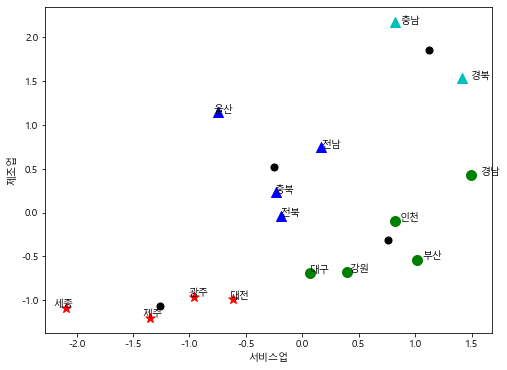

In [33]:
# Scaling을 진행하면 더 좋은 성능을 보여줌
plt.clf()
plt.figure(figsize=(8, 6))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(df2.shape[0]):
    label = km.labels_[n]
    plt.scatter(df2['서비스업'][n], df2['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(df2['서비스업'][n]*1.05, df2['제조업'][n]*0.99, df2.index[n])
    
for i in range(km.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'k', s= 50)

### Let's use all features for clustering (instead of two)

In [34]:
df.head().T

구분,강원,경기,경남,경북,광주
주거용,1940933,16587710,4260988,3302463,1954876
공공용,1400421,5533662,1427560,1578115,565527
서비스업,6203749,33434551,8667737,8487402,3174973
업무용합계,7604170,38968213,10095297,10065517,3740500
농림어업,607139,2371347,2141813,1747462,74608
광업,398287,317263,95989,224568,2898
제조업,6002286,56603327,18053778,30115601,2910768
식료품제조,546621,2544420,932743,566071,161072
"섬유,의류",13027,2109963,346974,3780171,295922
"목재,나무",19147,529274,60160,72680,6782


In [35]:
df.drop(['업무용합계', '산업용합계', '합계'], axis=1, inplace=True, errors='ignore')
df.drop(['경기','서울'], inplace=True,errors='ignore')

In [36]:
df.head()

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이",...,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,607139,398287,6002286,546621,13027,19147,24382,...,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418
경남,4260988,1427560,8667737,2141813,95989,18053778,932743,346974,60160,817685,...,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662
경북,3302463,1578115,8487402,1747462,224568,30115601,566071,3780171,72680,361772,...,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104
광주,1954876,565527,3174973,74608,2898,2910768,161072,295922,6782,41827,...,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049
대구,3151904,826396,5470438,69142,5858,5862633,212626,1057342,16215,445646,...,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616


In [37]:
index_ = df.index
column_ = df.columns

In [38]:
index_

Index(['강원', '경남', '경북', '광주', '대구', '대전', '부산', '세종', '울산', '인천', '전남', '전북',
       '제주', '충남', '충북'],
      dtype='object', name='구분')

In [39]:
column_

Index(['주거용', '공공용', '서비스업', '농림어업', '광업', '제조업', '식료품제조', '섬유,의류', '목재,나무',
       '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속', '조립금속', '기타기계',
       '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료'],
      dtype='object')

In [40]:
list(column_)

['주거용',
 '공공용',
 '서비스업',
 '농림어업',
 '광업',
 '제조업',
 '식료품제조',
 '섬유,의류',
 '목재,나무',
 '펄프,종이',
 '출판,인쇄',
 '석유,화확',
 '의료,광학',
 '요업',
 '1차금속',
 '조립금속',
 '기타기계',
 '사무기기',
 '전기기기',
 '영상,음향',
 '자동차',
 '기타운송',
 '가구및기타',
 '재생재료']

In [41]:
list(column_).index('제조업'), list(column_).index('서비스업')

(5, 2)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
df_scaled = scaler.fit_transform(df) # returns an array!!

In [43]:
print(type(df), type(df_scaled))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


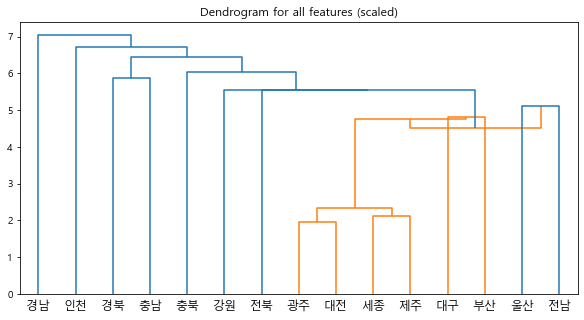

In [44]:
Z = linkage(df_scaled, metric='euclidean', method='centroid')
plt.figure(figsize=(10,5))
plt.title('Dendrogram for all features (scaled)')
dendrogram(Z, labels=index_)
plt.show()

In [47]:
km = KMeans(n_clusters=4).fit(df_scaled)
print(km.cluster_centers_)
print(km.labels_)

[[ 0.47507237  0.93772248  1.12104758  0.98432519  1.2790136   1.85861879
   0.68909021  1.58320209  0.06523783  0.4158599   1.13785365  0.45910913
   0.34147599  0.3655753   2.22644616  0.5894539   0.49134744  0.15503658
   0.81377495  2.11892669  1.6060087  -0.39167828 -0.26144221  0.70392275]
 [ 1.20026882  0.13266712  0.63240029 -0.84502284 -0.5494988  -0.43930772
  -0.2550615  -0.02508503  0.87771936 -0.6650433   1.26992967 -0.5482071
   0.89039529 -0.60953775 -0.35119752  0.61664503  0.67192295  0.90081667
  -0.48028988 -0.37049519  0.02197888 -0.31903207  0.36431352 -0.07331947]
 [-0.80670038 -0.65022296 -0.74554771 -0.15444205 -0.1766458  -0.43227338
  -0.72564872 -0.39191158 -0.50458273 -0.47379294 -0.79242599  0.16406657
  -0.45929592 -0.02806164 -0.39192638 -0.78715114 -0.73512937 -0.48012602
  -0.5501468  -0.46830075 -0.56935008 -0.10680832 -0.56171066 -0.71096136]
 [ 0.36531715  0.75937145  0.35984598  0.54917082  0.1089966   0.20886642
   1.48884838 -0.11592266  0.2561484

In [48]:
# clustering 결과가 모두 다른 것을 확인할 수 있다
print("all features, scaled: ", km.labels_)
print("two features:         ", km_labels_two)
print("two features, scaled: ", km_labels_two_scaled)

all features, scaled:  [2 3 0 2 1 2 1 2 2 1 2 3 2 0 3]
two features:          [2 3 1 2 2 2 2 2 3 0 3 0 2 1 0]
two features, scaled:  [2 2 1 0 2 0 2 0 3 2 3 3 0 1 3]


## DBSCAN(eps=, min_samples=,metric=) 
- eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
- min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.
- metric: The metric to use when calculating distance between instances in a feature array. 

In [49]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=300, noise=0.05, random_state=11)   # X :samples, y: label

X[:5],y[:5]

(array([[ 0.09999454, -0.06140157],
        [-0.84634104,  0.72976933],
        [-0.22592098,  0.99424568],
        [ 1.2646073 , -0.39786026],
        [ 0.98061929,  0.19150151]]),
 array([1, 0, 0, 1, 0], dtype=int64))

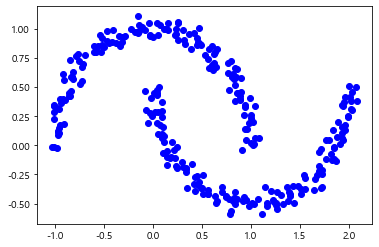

In [50]:
plt.scatter(X[:,0], X[:,1], c='b')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)   # returns a predicted array

predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

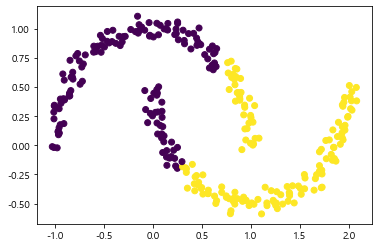

In [52]:
plt.scatter(X[:,0], X[:,1],c=predict)

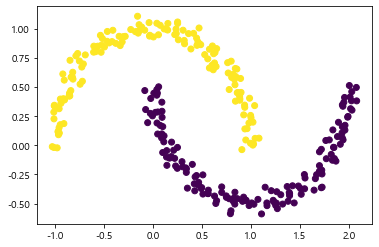

In [53]:
# epsilon 값이 DBSCAN에서 가장 중요한 값
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

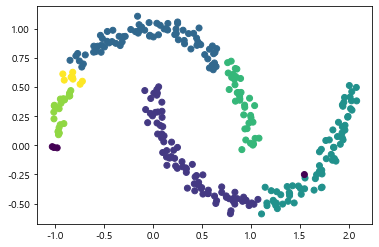

In [55]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)
# 적절한 min 값을 활용하여야 한다

[-1 -1 -1  4 -1 -1 -1 -1  1 -1 -1 -1  2 -1 -1 -1  2  0 -1  7 -1 -1 -1 -1
 -1  2 -1 -1 -1 -1  5 -1 -1  7 -1  7 -1  0  1 -1 -1  4 -1  9 -1 -1  3 -1
  1 -1  0 -1 -1  2 -1 -1 -1 -1  5 -1  0 -1 -1  8 -1 -1 -1 -1  2  7  3  3
 -1 -1 -1 -1  6  6  3 -1 -1  8 -1  7 -1  4 -1  7 -1 -1  0 -1  7 -1 -1 -1
 -1  4 -1  8  4  5 -1 -1  0 -1 -1  4  4 -1 -1 -1 -1  3  2  9  3 -1  1  9
  6 -1  5 -1  0  3 -1  6 -1  5  5 -1  1 -1  8 -1 -1  6  4 -1 -1  2 -1 -1
 -1 -1 -1  9  1 -1 -1  0  0  4 -1  8 -1 -1  3  4 -1 -1 -1  4 -1 -1 -1 -1
  0  1  1 -1  4 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  3  0 -1 -1 -1
 -1 -1  9 -1 -1 -1  5  3 -1  5  4 -1  6 -1 -1  2  3  0 -1 -1 -1 -1 -1 -1
  0 -1  9 -1  9 -1 -1 -1 -1 -1  3 -1  2  5  1 -1 -1 -1 -1 -1 -1 -1 -1  7
 -1  7 -1 -1 -1 -1 -1  7  9 -1 -1 -1 -1 -1  0  2  2 -1  6 -1  6  6  2  0
 -1 -1 -1 -1  4  8  2 -1  8  3  9 -1  1  4 -1 -1 -1  5 -1 -1 -1 -1 -1 -1
  4 -1  6 -1 -1 -1 -1 -1 -1 -1  9 -1]


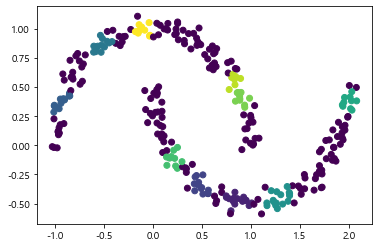

In [56]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
print(predict)
plt.scatter(X[:,0], X[:,1],c=predict)

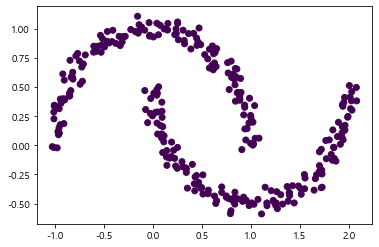

In [57]:
# epsilon이 커지면 모든 sample이 같은 군으로 클러스터링 된다
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

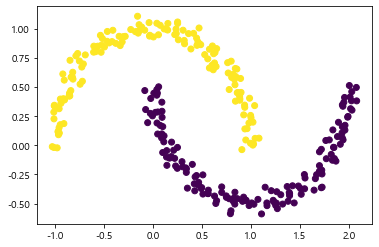

In [58]:
dbscan = DBSCAN(eps=0.2, min_samples=6, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

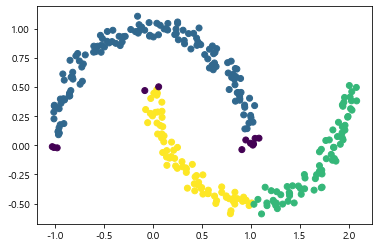

In [63]:
# min_sample 이 높아지면 코어로 판단하는 기준이 높아진다
dbscan = DBSCAN(eps=0.2, min_samples=18, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

### More on clustering

In [86]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

X = [[0, 1], [1, 1]]
print(euclidean_distances(X, X))
print(euclidean_distances(X, [[0,0]]))
print(cosine_distances(X,X))       # defined as 1 - cos_similarity

print(manhattan_distances(X,[[0,0]])) # 수직 또는 수평으로만 이동가능한 거리

[[0. 1.]
 [1. 0.]]
[[1.        ]
 [1.41421356]]
[[0.         0.29289322]
 [0.29289322 0.        ]]
[[1.]
 [2.]]


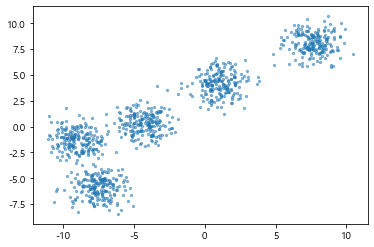

In [65]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_features=2, n_samples=1000, centers=5, cluster_std=1, random_state=3)    
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

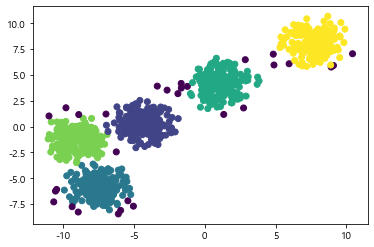

In [82]:
# min_sample 이 높아지면 코어로 판단하는 기준이 높아진다
# 보라색으로 찍힌 점들은 noise 라고 할 수 있다.
dbscan = DBSCAN(eps=0.8, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

##### KMeans Algorithm
1. Initialize k centroids.
2. Assign each data to the nearest centroid, these step will create clusters.
3. Recalculate centroid - which is mean of all data belonging to same cluster.
4. Repeat steps 2 & 3, till there is no data to reassign a different centroid.

Animation to explain algo - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/